## Importing the dataset

In [ ]:
# import the rome_rents_clean.csv dataset into a pandas dataframe
import pandas as pd
import numpy as np

df = pd.read_csv('italy-house-prices/rome-cleaned-data.csv')
df.head()

,quartiere,prezzo,datetime,posti auto,bagni per stanza,bagni,stanze,ultimo piano,stato,classe energetica,...,giardino privato,impianto allarme,portiere,piscina,villa,intera proprieta,appartamento,attico,loft,mansarda
0,Acilia,400.0,2023-03-16,0,1.0,1.0,1.0,0,ottimo / ristrutturato,G,...,0,0,0,0,0,0,1,0,0,0
1,Acilia,400.0,2023-03-16,0,1.0,1.0,1.0,0,ottimo / ristrutturato,B,...,0,0,0,0,0,0,1,0,0,0
2,Acilia,400.0,2023-03-15,0,1.0,1.0,1.0,0,ottimo / ristrutturato,E,...,0,0,0,0,0,0,1,0,0,0
3,Acilia,400.0,2023-03-16,0,1.0,1.0,1.0,0,ottimo / ristrutturato,D,...,0,0,0,0,0,0,1,0,0,0
4,Acilia,600.0,2023-03-16,1,0.5,1.0,2.0,0,ottimo / ristrutturato,B,...,0,0,0,0,0,0,1,0,0,0


## Data Preprocessing

## Data Augmentation

In [ ]:
# add feature "superficie**2"
df['superficie_squared'] = df['m2'] ** 2
# add feature "mq_per_stanza"
df['mq_per_stanza'] = df['m2'] / df['stanze']

/tmp/ipykernel_28997/409522118.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['superficie_squared'] = df['superficie'] ** 2
/tmp/ipykernel_28997/409522118.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mq_per_stanza'] = df['superficie'] / df['stanze']
/tmp/ipykernel_28997/409522118.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

In [8]:
# create the target variable for classification: y_classificazione
# if prezzo_al_mq is greater than mean_prezzo_al_mq, then y_classificazione is 1, otherwise 0
mean_prezzo_al_mq = df['prezzo_al_mq'].mean()
df['y_classificazione'] = (df['prezzo_al_mq'] > mean_prezzo_al_mq).astype(int)
# print also prezzo al mq mean of Rome rents
print(f"Mean prezzo al mq of Rome rents: {mean_prezzo_al_mq}")
df.head()

Mean prezzo al mq of Rome rents: 18.93295721441702


/tmp/ipykernel_28997/3860018232.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['y_classificazione'] = (df['prezzo_al_mq'] > mean_prezzo_al_mq).astype(int)


,prezzo,posti auto,bagni per stanza,bagni,stanze,ultimo piano,classe energetica,vista mare,riscaldamento centralizzato,superficie,...,quartiere_Villa Fiorelli,quartiere_Villa Gordiani,quartiere_Villaggio Olimpico,quartiere_Vitinia,quartiere_Vittorio Veneto,superficie_squared,mq_per_stanza,stanze_totali,prezzo_al_mq,y_classificazione
0,400.0,0,1.0,1,1,0,0,0.0,0.0,20.0,...,0,0,0,0,0,400.0,20.0,2,20.0,1
1,400.0,0,1.0,1,1,0,5,0.0,0.0,20.0,...,0,0,0,0,0,400.0,20.0,2,20.0,1
2,400.0,0,1.0,1,1,0,2,0.0,0.0,20.0,...,0,0,0,0,0,400.0,20.0,2,20.0,1
3,400.0,0,1.0,1,1,0,3,0.0,0.0,25.0,...,0,0,0,0,0,625.0,25.0,2,16.0,0
4,600.0,1,0.5,1,2,0,5,0.0,0.0,50.0,...,0,0,0,0,0,2500.0,25.0,3,12.0,0


### Outlier Handling

In [9]:
# Remove outliers based on 'prezzo_al_mq' column using IQR method
Q1 = df['prezzo_al_mq'].quantile(0.25)
Q3 = df['prezzo_al_mq'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['prezzo_al_mq'] >= Q1 - 1.5 * IQR) & (df['prezzo_al_mq'] <= Q3 + 1.5 * IQR)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9670
Columns: 233 entries, prezzo to y_classificazione
dtypes: bool(2), float64(8), int64(219), int8(4)
memory usage: 15.6 MB


## Data Normalization

In [10]:
## Normalize the numerical features using StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# split into training, validation, and test set
from random import randint
# get random number to use as random_state
random_state = randint(0, 10000)
train_val_df, test_df = train_test_split(df, test_size=0.1, random_state=random_state)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=random_state)
# separate features and target variable for regression and classification
X_train = train_df.drop(columns=['prezzo', 'y_classificazione'])
y_train_regression = train_df['prezzo']
y_train_classification = train_df['y_classificazione']
X_val = val_df.drop(columns=['prezzo', 'y_classificazione'])
y_val_regression = val_df['prezzo']
y_val_classification = val_df['y_classificazione']
X_test = test_df.drop(columns=['prezzo', 'y_classificazione'])
y_test_regression = test_df['prezzo']
y_test_classification = test_df['y_classificazione']

In [11]:
# normalize only numerical columns using StandardScaler
numerical_cols = ['superficie', 'superficie_squared', 'posti auto', 'stanze', 'mq_per_stanza', 'stanze_totali', 'prezzo_al_mq']
print("Numerical columns to be normalized:")
print(numerical_cols)
scaler = RobustScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
X_train.head()

Numerical columns to be normalized:
['superficie', 'superficie_squared', 'posti auto', 'stanze', 'mq_per_stanza', 'stanze_totali', 'prezzo_al_mq']


,posti auto,bagni per stanza,bagni,stanze,ultimo piano,classe energetica,vista mare,riscaldamento centralizzato,superficie,arredato,...,quartiere_Villa Bonelli,quartiere_Villa Fiorelli,quartiere_Villa Gordiani,quartiere_Villaggio Olimpico,quartiere_Vitinia,quartiere_Vittorio Veneto,superficie_squared,mq_per_stanza,stanze_totali,prezzo_al_mq
2453,0.0,0.250000,1,2.0,0,0,0.0,0.0,1.000,1,...,0,0,0,0,0,0,1.214286,-0.238938,1.0,-0.489091
2587,0.0,0.666667,2,1.0,0,0,0.0,1.0,0.500,1,...,0,0,0,0,0,0,0.535714,-0.017699,1.0,0.453513
2404,0.0,0.500000,1,0.0,0,5,0.0,0.0,-0.250,1,...,0,0,0,0,0,0,-0.214286,-0.106195,0.0,-0.347353
817,0.0,0.333333,1,1.0,0,0,0.0,0.0,1.375,0,...,0,0,0,0,0,0,1.816964,1.221239,0.5,-0.642477
816,0.0,0.333333,1,1.0,0,0,0.0,0.0,0.100,0,...,0,0,0,0,0,0,0.095714,-0.584071,0.5,0.195063


## Model Training

In [12]:
# train a linear regression model to predict the price
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg_model = LinearRegression()

# Apply log transformation to the target variable
y_train_log = np.log(y_train_regression)

# Perform cross-validation on the training set
cv_scores = cross_val_score(reg_model, X_train, y_train_log, cv=5, scoring='neg_mean_squared_error')
# Print cross-validation results
print("Cross-validation MSE scores:", -cv_scores)
print("Mean cross-validation MSE:", -cv_scores.mean())

# Fit the model on the entire training set
reg_model.fit(X_train, y_train_log)

Cross-validation MSE scores: [0.00653312 0.00992003 0.00877714 0.00858561 0.00758954]
Mean cross-validation MSE: 0.008281086903770862


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred_log = reg_model.predict(X_test)
# Convert predictions back to the original scale
y_pred_original = np.exp(y_pred_log)

# calculate mean squared error
from sklearn.metrics import mean_squared_error
# print overall mse
mse = mean_squared_error(y_test_regression, y_pred_original)
print(f"Mean Squared Error on test set: {mse:.2f}")

# calculate abs error based on zone (Zone_Center, Zone_North, Zone_Northeast, Zone_East, Zone_Southeast, Zone_South, Zone_Southwest, Zone_West, Zone_Northwest)
zones = [col for col in X_test.columns if col.startswith('Zone_')]
for zone in zones:
    zone_mask = (X_test[zone] == 1)
    # if no samples in this zone, skip
    if zone_mask.sum() == 0:
        continue
    zone_abs_errors = np.abs(y_test_regression[zone_mask] - y_pred_original[zone_mask])
    zone_mse = mean_squared_error(y_test_regression[zone_mask], y_pred_original[zone_mask])
    print(f"Zone: {zone}, absolute error mean: {zone_abs_errors.mean():.2f}, MSE: {zone_mse:.2f}")

# print some predictions vs actual values divided by zone
for zone in zones:
    zone_mask = (X_test[zone] == 1)
    # if no samples in this zone, skip
    if zone_mask.sum() == 0:
        continue
    print(f"Predictions for zone {zone}:")
    for i in range(min(5, zone_mask.sum())):
        idx = np.where(zone_mask)[0][i]
        print(f"Predicted: {y_pred_original[idx]:.2f}, Actual: {y_test_regression.iloc[idx]:.2f}")

# Predicted vs Actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_regression, y_pred_original, alpha=0.7, color='blue')
plt.plot([y_test_regression.min(), y_test_regression.max()], [y_test_regression.min(), y_test_regression.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')
plt.show()

Mean Squared Error on test set: 12605.88
Zone: Zone_Center, absolute error mean: 94.24, MSE: 17741.50
Zone: Zone_East, absolute error mean: 45.71, MSE: 3033.24
Zone: Zone_North, absolute error mean: 70.56, MSE: 8619.90
Zone: Zone_Northeast, absolute error mean: 41.11, MSE: 3558.32
Zone: Zone_Northwest, absolute error mean: 76.88, MSE: 38268.97
Zone: Zone_South, absolute error mean: 55.34, MSE: 13106.75
Zone: Zone_Southeast, absolute error mean: 45.60, MSE: 4659.55
Zone: Zone_Southwest, absolute error mean: 41.61, MSE: 4585.47
Predictions for zone Zone_Center:
Predicted: 1808.85, Actual: 2000.00
Predicted: 1899.91, Actual: 2000.00
Predicted: 1345.11, Actual: 1200.00
Predicted: 1409.31, Actual: 1200.00
Predicted: 1271.16, Actual: 1300.00
Predictions for zone Zone_East:
Predicted: 681.99, Actual: 750.00
Predicted: 680.24, Actual: 750.00
Predicted: 587.44, Actual: 600.00
Predicted: 664.90, Actual: 600.00
Predicted: 633.91, Actual: 650.00
Predictions for zone Zone_North:
Predicted: 1041.38,

NameError: name 'plt' is not defined

## Part 4: Evaluation

In this section, we will evaluate the models using the following metrics:

- Accuracy, Precision, Recall, and F1 Score
- Confusion Matrix
- ROC and AUC (binary and multiclass)
- Training vs. Validation Performance
- Optional: Computational cost and training time

We will also visualize these metrics using appropriate graphics.

Mean Squared Error (MSE): 1530306.12
R-squared (R2): -2.92
Training Time: 0.02 seconds


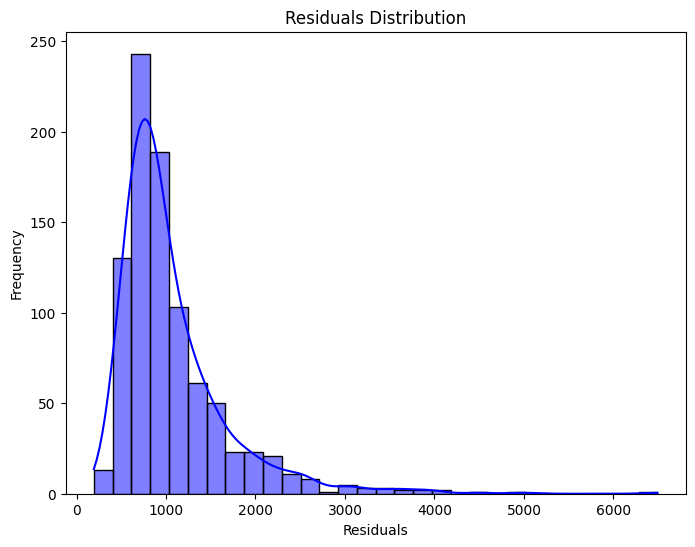

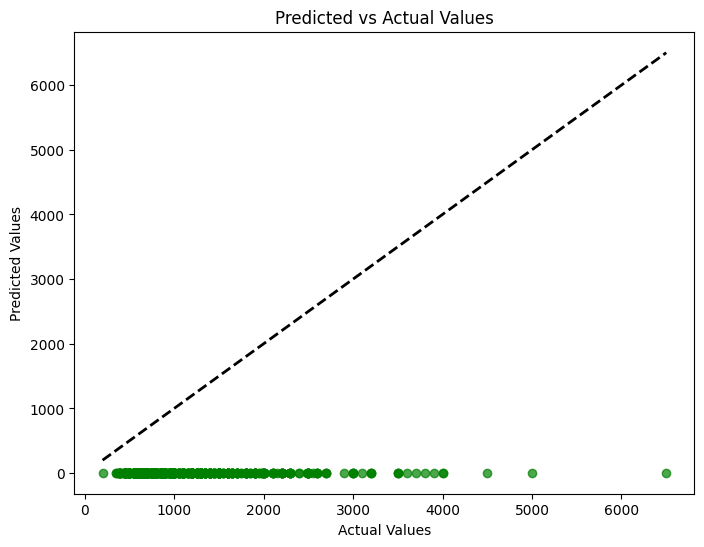

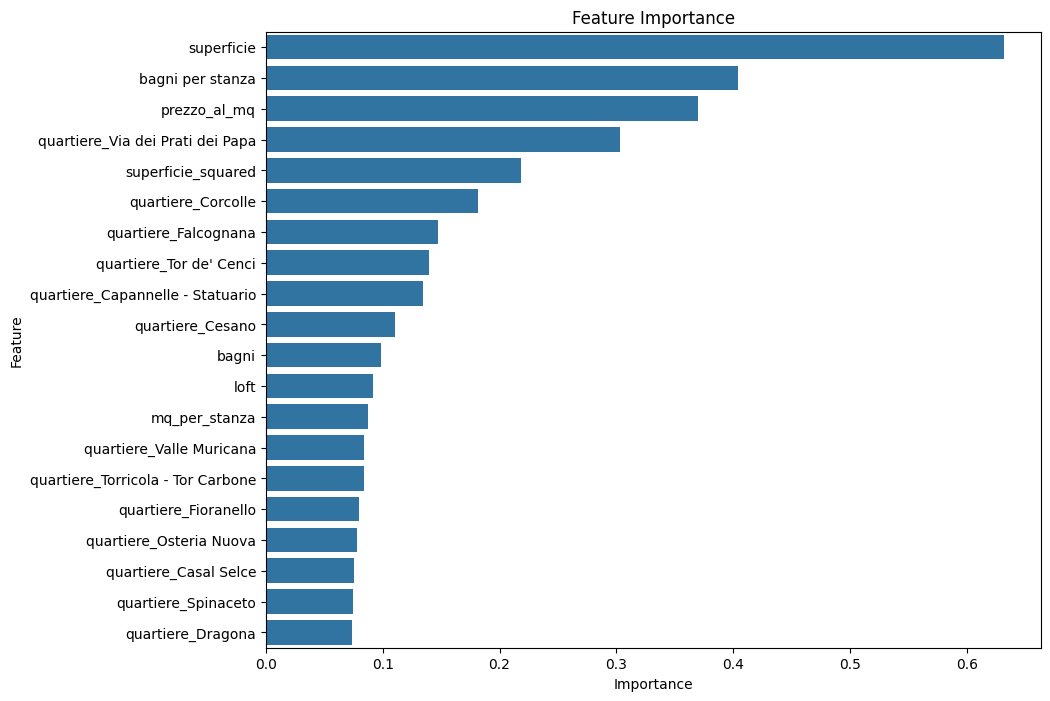

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Evaluate regression model
start_time = time.time()
y_pred_regression = reg_model.predict(X_test)
end_time = time.time()

# Metrics
mse = mean_squared_error(y_test_regression, y_pred_regression)
r2 = r2_score(y_test_regression, y_pred_regression)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Training Time: {end_time - start_time:.2f} seconds")

# Residuals plot
plt.figure(figsize=(8, 6))
residuals = y_test_regression - y_pred_regression
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# predicted vs actual (fit to the data)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_regression, y_pred_regression, alpha=0.7, color='green')
plt.plot([y_test_regression.min(), y_test_regression.max()], [y_test_regression.min(), y_test_regression.max()], 'k--', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# plot feature importance (first 20 features) based on absolute value of coefficients
feature_importance = np.abs(reg_model.coef_)
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [14]:
# average error based on zona 
zones = [col for col in X_test.columns if col.startswith('Zone_')]
zone_errors_data = []
for zone in zones:
    zone_mask = (X_test[zone] == 1)
    # if no samples in this zone, skip
    if zone_mask.sum() == 0:
        continue
    zone_errors = np.abs(y_test_regression[zone_mask] - y_pred_original[zone_mask])
    avg_error_euro = zone_errors.mean()
    zone_errors_data.append({'Zone': zone.replace('Zone_', ''), 'Avg Error (€)': avg_error_euro, 'Samples': zone_mask.sum()})

# Create DataFrame
zone_errors_df = pd.DataFrame(zone_errors_data)

# Print table
print("Average Error in Euro by Zone:")
print("-" * 50)
print(zone_errors_df.to_string(index=False))

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(zone_errors_df['Zone'], zone_errors_df['Avg Error (€)'], color='steelblue', alpha=0.8)
plt.xlabel('Zone', fontsize=12)
plt.ylabel('Average Error (€)', fontsize=12)
plt.title('Average Prediction Error by Zone', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'€{height:.0f}',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Average Error in Euro by Zone:
--------------------------------------------------
     Zone  Avg Error (€)  Samples
   Center      94.238372       64
     East      45.705030       87
    North      70.561880       93
Northeast      41.106071      112
Northwest      76.875181      148
    South      55.341513      144
Southeast      45.596888       94
Southwest      41.609626      154


NameError: name 'plt' is not defined

### Classification Model Evaluation

#### Naive Bayes Classifier Evaluation

In [ ]:
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import cross_val_score
nb_model = GaussianNB()
# Perform cross-validation on the training set
cv_scores_nb = cross_val_score(nb_model, X_train, y_train_classification, cv=5, scoring='accuracy')
# Print cross-validation results
print("Naive Bayes Cross-validation accuracy scores:", cv_scores_nb)
print("Mean cross-validation accuracy:", cv_scores_nb.mean())

Naive Bayes Cross-validation accuracy scores: [0.48176881 0.4833204  0.47013189 0.47323507 0.47711404]
Mean cross-validation accuracy: 0.4771140418929402


In [ ]:
# Now fit and predict with Naive Bayes Classifier
nb_model.fit(X_train, y_train_classification)
y_pred_classification = nb_model.predict(X_test)
# Evaluate classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification)
recall = recall_score(y_test_classification, y_pred_classification)
f1 = f1_score(y_test_classification, y_pred_classification)
conf_matrix = confusion_matrix(y_test_classification, y_pred_classification)
print("Naive Bayes Classification Accuracy:", accuracy)
print("Naive Bayes Classification Precision:", precision)
print("Naive Bayes Classification Recall:", recall)
print("Naive Bayes Classification F1 Score:", f1)
print("Naive Bayes Confusion Matrix:\n", conf_matrix)

Naive Bayes Classification Accuracy: 0.45870535714285715
Naive Bayes Classification Precision: 0.29955947136563876
Naive Bayes Classification Recall: 0.9622641509433962
Naive Bayes Classification F1 Score: 0.4568868980963046
Naive Bayes Confusion Matrix:
 [[207 477]
 [  8 204]]


#### Logistic Regression Classifier Evaluation

In [ ]:
# Logistic Regression Classifier Evaluation
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)
# Perform cross-validation on the training set
cv_scores_logreg = cross_val_score(logreg_model, X_train, y_train_classification, cv=5, scoring='accuracy')
# Print cross-validation results
print("Logistic Regression Cross-validation accuracy scores:", cv_scores_logreg)
print("Mean cross-validation accuracy:", cv_scores_logreg.mean())   

Logistic Regression Cross-validation accuracy scores: [0.99534523 0.99379364 0.99224205 0.99379364 0.99844841]
Mean cross-validation accuracy: 0.9947245927075252


In [ ]:
# Now fit and prefict with Logistic Regression Classifier
logreg_model.fit(X_train, y_train_classification)
y_pred_logreg = logreg_model.predict(X_test)
# Evaluate classification model
accuracy_logreg = accuracy_score(y_test_classification, y_pred_logreg)
precision_logreg = precision_score(y_test_classification, y_pred_logreg)
recall_logreg = recall_score(y_test_classification, y_pred_logreg)
f1_logreg = f1_score(y_test_classification, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test_classification, y_pred_logreg)
print("Logistic Regression Classification Accuracy:", accuracy_logreg)
print("Logistic Regression Classification Precision:", precision_logreg)
print("Logistic Regression Classification Recall:", recall_logreg)
print("Logistic Regression Classification F1 Score:", f1_logreg)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_logreg)    

Logistic Regression Classification Accuracy: 0.9899553571428571
Logistic Regression Classification Precision: 0.9903381642512077
Logistic Regression Classification Recall: 0.9669811320754716
Logistic Regression Classification F1 Score: 0.9785202863961814
Logistic Regression Confusion Matrix:
 [[682   2]
 [  7 205]]
